----
# **[모형 선택]**
----

# 1. 환경 구성

## 1.1 한글 사용 및 환경 구성 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)

In [3]:
plt.rc('font',family='Malgun Gothic')

## 1.2 기본 도구 가져오기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_iris

In [6]:
from sklearn.metrics import accuracy_score  #모델평가  

* 분류 모형 평가 시에는 accuracy_score(정확도를 알 수 있게 해 주는 함수)를 쓰고 
* 회귀 모형 평가 시는 r2_score(결정계수(R의 제곱)를 알 수 있게 해 주는 함수)를 쓰는 게 일반적입니다.

In [7]:
import pandas as pd

## 1.3 경고 문구 무시


* 이 자료에서 실행되는 코드 중에는 다양한 경고 문구가 나올 수 밖에 없는 게 있습니다.
* 이럴 때 경고 문구를 출력하지 않게 하려면 다음 코드를 활용합시다.

In [8]:
import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 준비
 

## 2.1 데이터 수집

In [9]:
# 붓꽃 데이터를 읽어 옵니다.
(X, y) = load_iris(return_X_y=True, as_frame=False)

* return_X_y를 True로 지정하면, load_iris 함수는 붓꽃 데이터를 X항과 y항으로 나누어 반환해 줍니다.
* as_frame을 False로 지정해야(기본 값임) 데이터가 넘파이 배열(ndarray형 배열)로 반환됩니다. 
  * 사이킷런의 각종 클래스, 함수, 메서드는 기본적으로 데이터를 넘파이 배열 형식으로 받습니다.

In [10]:
# X항의 내용을 확인해 봅시다. 
pd.DataFrame(X)   # -> X의 항이 여러개 분선기법  = 특성 여러개  

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# y항의 내용을 확인해 봅시다.
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


* y항을 통해서 우리는 데이터가 품종별로 수집되어 있다는 점을 알 수 있습니다. 
* 따라서 반드시 데이터를 재편성(shuffle)해서 훈련용 데이터와 검정용 데이터를 준비해야 합니다.

## 2.2 데이터 분할

In [12]:
# 훈련용 집합(train set)과 검정용 집합(test set)으로 분할합니다.   7:3(기본) , 8:2 
# 손실율 기대효과  :  새로운데이터 수집 / 학습데이터일부 죽이기 / 분할 새로하기  
훈련용_X, 검정용_X, 훈련용_y, 검정용_y = train_test_split(X, y, train_size=0.6, test_size = 0.4, shuffle=True)

* 데이터가 충분히 많다면 흔히 검정용 데이터(test data, test set) 비율을 20%로 잡습니다. 
* 하지만 붓꽃 데이터 분량이 많지 않아서 여기서는 전체 데이터 중 40%를 검정용 데이터로 따로 떼어서 사용합니다. 


In [13]:
# 각 데이터의 내용을 확인해 봅시다. 
pd.DataFrame(훈련용_X)

,0,1,2,3
0,6.7,3.1,4.4,1.4
1,7.0,3.2,4.7,1.4
2,6.2,2.8,4.8,1.8
3,5.1,3.8,1.9,0.4
4,6.8,2.8,4.8,1.4
...,...,...,...,...
85,6.0,2.7,5.1,1.6
86,6.7,2.5,5.8,1.8
87,6.8,3.0,5.5,2.1
88,6.1,2.9,4.7,1.4


In [14]:
pd.DataFrame(훈련용_y)

,0
0,1
1,1
2,2
3,0
4,1
...,...
85,1
86,2
87,2
88,1


* 이 훈련용 y 값을 통해서 우리는 데이터가 재편성되어 있음을 알 수 있습니다.
* 즉, 데이터가 섞였다는 말입니다.

In [15]:
pd.DataFrame(검정용_X).head()

,0,1,2,3
0,6.4,2.8,5.6,2.2
1,5.6,2.8,4.9,2.0
2,4.4,3.2,1.3,0.2
3,6.6,2.9,4.6,1.3
4,5.5,2.6,4.4,1.2


In [16]:
pd.DataFrame(검정용_y).head()

,0
0,2
1,2
2,0
3,1
4,1


* 여기서 shuffle을 True로 해 버리면 매번 데이터 순서가 바뀌는 꼴이 되어 매번 실행 시마다 결과가 다르게 나오게 되므로 주의합시다.
* 그러나 일부러 False로 해서 데이터가 재편성(reshape) 되게 해서 비교해 보는 일도 의미가 있습니다. 

# 3. 모델 선택 방법

* 사이킷런에서는 모델을 선택하는 일과 관련한 설명서를 제공합니다.
  * 공식 설명서: https://scikit-learn.org/stable/model_selection.html#model-selection
  * 이 설명서를 보면 크게 네 가지 방법을 제시합니다.
    * 추정기 성능 평가를 위한 [교차 검증]
    * 한 가지 추정기의 [하이퍼 파라미터 조율 ]
    * 예측 품질의 정량화를 위한 계량과 [점수 매기기]
    * 평가한 모형의 점수를 [검증 곡선]으로 그려 보기





* 여기서는 이 중에서도 간단하면서도 대표적인 방법을 활용해 보겠습니다. 
  * 점수 매기기(scoring)
  * 교차 검증(cross validation)

## 3.1 점수 매기기

### 3.1.1 각종 추정기 확인

In [17]:
# 모든 추정기 클래스들을 리스트 형태로 가져오는 데 사용하는 함수입니다.
from sklearn.utils import all_estimators

* all_estimators 함수로는 사이킷런이 제공하는 모든 추정기를 선별할 수 있습니다.
* 공식 설명서: https://scikit-learn.org/1.0/modules/generated/sklearn.utils.all_estimators.html

#### 3.1.1.1 분류기 클래스 추출

In [18]:
# 분류기 클래스들을 추출하기 
# 이 말은 곧 분류하는 일을 전문으로 하는 로봇 설계도(즉, 인공지능 모형 클래스)를 찾아내라는 말과 같습니다.
분류기_클래스들 = all_estimators(type_filter="classifier")
분류기_클래스들

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('ClassifierChain', sklearn.multioutput.ClassifierChain),
 ('ComplementNB', sklearn.naive_bayes.ComplementNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('GaussianProcessClassifier',
  sklearn.gaussian_process._gpc.GaussianProcessClassifier),
 ('GradientBoostingClassifier',
  sklearn.ensemble._gb.GradientBoostingClassifier),
 ('HistGradientBoostingClassifier',
  sklearn.ensemble._hist_gradi

* 이 출력 내용을 보면 리스트의 각 원소가 ('분류기 명칭', 분류기 클래스) 꼴의 튜플임을 알 수 있습니다.
* 또한 분류기가 굉장히 많음을 알 수 있습니다.

In [19]:
# 보기 좋게 데이터프레임에 넣어 출력해 봅시다.
pd.DataFrame(분류기_클래스들)

,0,1
0,AdaBoostClassifier,<class 'sklearn.ensemble._weight_boosting.AdaB...
1,BaggingClassifier,<class 'sklearn.ensemble._bagging.BaggingClass...
2,BernoulliNB,<class 'sklearn.naive_bayes.BernoulliNB'>
3,CalibratedClassifierCV,<class 'sklearn.calibration.CalibratedClassifi...
4,CategoricalNB,<class 'sklearn.naive_bayes.CategoricalNB'>
5,ClassifierChain,<class 'sklearn.multioutput.ClassifierChain'>
6,ComplementNB,<class 'sklearn.naive_bayes.ComplementNB'>
7,DecisionTreeClassifier,<class 'sklearn.tree._classes.DecisionTreeClas...
8,DummyClassifier,<class 'sklearn.dummy.DummyClassifier'>
9,ExtraTreeClassifier,<class 'sklearn.tree._classes.ExtraTreeClassif...


#### 3.1.1.2 회귀기 클래스 추출

In [20]:
# 참고로 회귀기 클래스들을 출력해 봅시다.
회귀기_클래스들 = all_estimators(type_filter="regressor")
pd.DataFrame(회귀기_클래스들)

,0,1
0,ARDRegression,<class 'sklearn.linear_model._bayes.ARDRegress...
1,AdaBoostRegressor,<class 'sklearn.ensemble._weight_boosting.AdaB...
2,BaggingRegressor,<class 'sklearn.ensemble._bagging.BaggingRegre...
3,BayesianRidge,<class 'sklearn.linear_model._bayes.BayesianRi...
4,CCA,<class 'sklearn.cross_decomposition._pls.CCA'>
5,DecisionTreeRegressor,<class 'sklearn.tree._classes.DecisionTreeRegr...
6,DummyRegressor,<class 'sklearn.dummy.DummyRegressor'>
7,ElasticNet,<class 'sklearn.linear_model._coordinate_desce...
8,ElasticNetCV,<class 'sklearn.linear_model._coordinate_desce...
9,ExtraTreeRegressor,<class 'sklearn.tree._classes.ExtraTreeRegress...


#### 3.1.1.3 군집화 클래스 추출

* **군집화(clustering)**란 대표적인 **비지도 학습(non-supervised learning, 무감독 학습, 비교사 학습)** 방식입니다.
  * 레이블(label)=표적치(target)=종속변수(dependent variable)이 없이 하는 학습을 말합니다(예외도 있음).
  * 즉, y 항이 없다는 말입니다. 
  * y 항이 없기 때문에 군집화의 학습 목표는 데이터 사례별로 적절한 범주를 찾아 y 항으로 삼게 하는 게 됩니다.
* 이 중에서도 널리 쓰이는 군집화 방법은 다음과 같습니다.
  * k 평균(k-means)
    * 잘 설명한 곳: https://bcho.tistory.com/1203
  * 위계적 군집화(hierarchical clustering, 계층적 군집 분석)
    * 잘 설명한 곳: https://bcho.tistory.com/1204
  * DBSCAN(density-based spatial clustering of applications with noise, 밀도 기반 부분적 군집화)
    * 잘 설명한 곳: https://bcho.tistory.com/1205


In [21]:
# 참고로 군집 클래스들을 출력해 봅시다.
군집_클래스들 = all_estimators(type_filter="cluster")
pd.DataFrame(군집_클래스들)

,0,1
0,AffinityPropagation,<class 'sklearn.cluster._affinity_propagation....
1,AgglomerativeClustering,<class 'sklearn.cluster._agglomerative.Agglome...
2,Birch,<class 'sklearn.cluster._birch.Birch'>
3,BisectingKMeans,<class 'sklearn.cluster._bisect_k_means.Bisect...
4,DBSCAN,<class 'sklearn.cluster._dbscan.DBSCAN'>
5,FeatureAgglomeration,<class 'sklearn.cluster._agglomerative.Feature...
6,HDBSCAN,<class 'sklearn.cluster._hdbscan.hdbscan.HDBSC...
7,KMeans,<class 'sklearn.cluster._kmeans.KMeans'>
8,MeanShift,<class 'sklearn.cluster._mean_shift.MeanShift'>
9,MiniBatchKMeans,<class 'sklearn.cluster._kmeans.MiniBatchKMeans'>


#### 3.1.1.4 변환기 클래스 추출

* 변환기란 데이터를 변환하는 일을 담당하는 클래스나 모형을 일컫습니다.
* 대표적인 변환 작업으로는 다음과 같은 것들을 들 수 있습니다.
  * 차원 축소(dimensional reduction)
  * 이진화(binarize)
  * 요인 분석(factor analysis)
  * 레이블 인코딩(label encoding)
  * 잠재 디리클레 할당(latent Dirichlet allocation)
  * 선형 판별 분석(linear discriminant analysis)
  * 척도 구성(scaling, 눈금잡기)
  * 비음수 행렬 분해(non-negative matrix factorization)
  * 정규화(normalizing)
  * 원핫 인코딩(one-hot encoding)
  * 주성분 분석(pricipal component analysis)
  * 대치(imputing)
  * 특잇값 분해(sigular value decomposition)
  * 벡터화(vectorizing)
* 이러한 변환 작업은 주로 특징공학(feature engineering)의 관심사가 됩니다.
* 사이킷런에서는 이런 작업에 필요한 변환기를 다 제공합니다.


In [22]:
# 참고로 변환기 클래스들을 출력해 봅시다.
변환기_클래스들 = all_estimators(type_filter="transformer")
pd.set_option('display.max_rows', None)
pd.DataFrame(변환기_클래스들)
# 변환기_클래스들 

,0,1
0,AdditiveChi2Sampler,<class 'sklearn.kernel_approximation.AdditiveC...
1,BernoulliRBM,<class 'sklearn.neural_network._rbm.BernoulliR...
2,Binarizer,<class 'sklearn.preprocessing._data.Binarizer'>
3,Birch,<class 'sklearn.cluster._birch.Birch'>
4,BisectingKMeans,<class 'sklearn.cluster._bisect_k_means.Bisect...
5,CCA,<class 'sklearn.cross_decomposition._pls.CCA'>
6,ColumnTransformer,<class 'sklearn.compose._column_transformer.Co...
7,DictVectorizer,<class 'sklearn.feature_extraction._dict_vecto...
8,DictionaryLearning,<class 'sklearn.decomposition._dict_learning.D...
9,FactorAnalysis,<class 'sklearn.decomposition._factor_analysis...


### 3.1.2 분류기별 점수 확인

In [23]:
#  6:4로 분할된 붗꽃 데이터를 가지고 모델 및  정확도 검증을 확인 해보자. 
# 모형선택  1 : 정답 스코어를 확인 해서 모델 선택
#          2 :  손실율을 확인 후  스케일링 작업 후  하이퍼파라미터를 사용해서 적합한  모형선택  
순번 = 0

for (분류기명, 분류기_클래스) in 분류기_클래스들:
  # 오류가 나는 경우에 무시하도록 예외 처리 구문을 구성합니다. 
  try:  
    # 각 분류기의 인스턴스(즉, 모형)를 구성합니다.
    # 예를 들어 for 문이 첫 번째 돌 때 다음 문장의 꼴은
    # 분류기_인스턴스 = sklearn.ensemble._weight_boosting.AdaBoostClassifier() 꼴이 된다. 
    분류기_인스턴스 = 분류기_클래스()         
  except:
    # 클래스로 인스턴스를 생성할 때 파라미터 개수가 일치하지 않는 경우를 무시하게 합니다.
    pass

  # 훈련용 데이터를 사용해 모형을 훈련합니다.
  분류기_인스턴스.fit(훈련용_X, 훈련용_y)   

  # 검정용 데이터를 사용해 예측치를 뽑아냅니다.  
  예측치 = 분류기_인스턴스.predict(검정용_X)  

  # 정확도 점수를 출력합니다.
  print(f'[{순번:2d}] {분류기명:30s} 정확도 점수 = {accuracy_score(검정용_y, 예측치) * 100:.2f}%')

  순번 = 순번 + 1

[ 0] AdaBoostClassifier             정확도 점수 = 96.67%
[ 1] BaggingClassifier              정확도 점수 = 96.67%
[ 2] BernoulliNB                    정확도 점수 = 21.67%
[ 3] CalibratedClassifierCV         정확도 점수 = 81.67%
[ 4] CategoricalNB                  정확도 점수 = 96.67%
[ 5] ClassifierChain                정확도 점수 = 96.67%
[ 6] ComplementNB                   정확도 점수 = 58.33%
[ 7] DecisionTreeClassifier         정확도 점수 = 95.00%
[ 8] DummyClassifier                정확도 점수 = 21.67%
[ 9] ExtraTreeClassifier            정확도 점수 = 90.00%
[10] ExtraTreesClassifier           정확도 점수 = 96.67%
[11] GaussianNB                     정확도 점수 = 96.67%
[12] GaussianProcessClassifier      정확도 점수 = 100.00%
[13] GradientBoostingClassifier     정확도 점수 = 96.67%
[14] HistGradientBoostingClassifier 정확도 점수 = 93.33%
[15] KNeighborsClassifier           정확도 점수 = 98.33%
[16] LabelPropagation               정확도 점수 = 95.00%
[17] LabelSpreading                 정확도 점수 = 95.00%
[18] LinearDiscriminantAnalysis     정확도 점수 = 96.67%
[19] Linear

* 우리는 41개 분류기에 대한 정확도 점수를 알 수 있게 되었습니다.
* 이 중에 정확도가 가장 높은 분류기들을 선별하고 나서 각 분류기의 특성 등을 고려하여 적합한 분류기를 선택하면 됩니다.
* 분류기와 관련한 지표로는 대부분 '정확도(accuracy)'를 쓴다. 
* 회귀기와 관련한 지료로는 대부분 '결정계수(r2 score)'를 쓴다. 

## 3.2 교차 검증(cross validation)

* 우리는 앞에서 분류기별 정확도 점수를 보았습니다. 
* 다만 이럴 때 전체 데이터 중에 40%에 해당하는 데이터를 따로 뽑아 둔 검정용(테스트용) 데이터를 사용했습니다.
* 이번에는 훈련용 데이터를 여러 겹(fold)으로 나눠 그 중에 한 부분씩 차례로 검증용으로 사용해 평가를 해 보겠습니다. 
* k겹 교차 검증(k-fold cross validation)이라고도 부릅니다. 


### 3.2.1 각종 도구 가져오기

In [24]:
# k겹 교차 검증에 필요한 도구들을 가져옵니다.
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

### 3.2.2 교차 검증 모형 생성

In [25]:
# k겹 교차검증을 위한 인스턴스를 형성합니다.
k겹_교차검증_모형 = KFold(n_splits=6, shuffle=True, random_state=30)

* 전체 데이터 중에 60%를 훈련용으로 썼는데, 이것을 6겹으로 나눴으므로 전체 데이터 중에 10%씩을 검증용으로 쓰게 됩니다.
* 1개 제외 교차 검증(leave-one-out cross valition) 같은 극단적으로 나누는 경우도 있습니다(데이터가 극소수인 경우에 사용하는 방법).

### 3.2.3 교차 검증 점수 출력

In [26]:
순번 = 0

for(분류기명, 분류기_클래스) in 분류기_클래스들:
  # 오류가 나는 경우에 무시하도록 예외 처리 구문을 구성합니다. 
  try:  
    # 각 분류기의 인스턴스(즉, 모형)를 구성합니다.
    분류기_인스턴스 = 분류기_클래스()         
  except:
    # 클래스로 인스턴스를 생성할 때 파라미터 개수가 일치하지 않는 경우를 무시하게 합니다.
    pass

  # score라는 메서드를 지닌 인스턴스를 골라냅니다.  
  # 왜냐하면 cross_val_score 함수에서 score 메서드를 사용하기 때문입니다.
  # 각 추정기별로 score 메서드는 일반적으로 평균 정확도 점수를 반환해줍니다.
  # 이에 대해서는 각 추정기 클래스의 score 메서드를 확인해 봅시다. 
  if hasattr(분류기_인스턴스, "score"):
    try:
      점수들 = cross_val_score(분류기_인스턴스, 훈련용_X, 훈련용_y, cv=k겹_교차검증_모형)
    except:
      pass
    print(f'[{순번:2d}] {분류기명:30s} 교차 검증 점수 = {np.round(점수들, 4)} \t 평균 점수 = {np.mean(점수들)*100:.2f}%')
    # print(f'[{순번:2d}] {분류기명:30s} 교차 검증 점수 = {점수들} \t 평균 점수 = {np.mean(점수들)*100:.2f}%')
  
  순번 = 순번 + 1

[ 0] AdaBoostClassifier             교차 검증 점수 = [1.     0.9333 1.     0.8667 1.     0.9333] 	 평균 점수 = 95.56%
[ 1] BaggingClassifier              교차 검증 점수 = [1.     0.8667 1.     0.8667 0.9333 0.9333] 	 평균 점수 = 93.33%
[ 2] BernoulliNB                    교차 검증 점수 = [0.3333 0.4    0.3333 0.4667 0.6667 0.2667] 	 평균 점수 = 41.11%
[ 3] CalibratedClassifierCV         교차 검증 점수 = [1.     0.9333 0.8667 0.8    0.8    0.7333] 	 평균 점수 = 85.56%
[ 4] CategoricalNB                  교차 검증 점수 = [0.9333 0.8    0.9333 0.8    1.     0.9333] 	 평균 점수 = 90.00%
[ 5] ClassifierChain                교차 검증 점수 = [0.9333 0.8    0.9333 0.8    1.     0.9333] 	 평균 점수 = 90.00%
[ 6] ComplementNB                   교차 검증 점수 = [0.8667 0.8    0.7333 0.6    0.8    0.5333] 	 평균 점수 = 72.22%
[ 7] DecisionTreeClassifier         교차 검증 점수 = [1.     0.8667 0.9333 0.8667 1.     0.9333] 	 평균 점수 = 93.33%
[ 8] DummyClassifier                교차 검증 점수 = [0.3333 0.4    0.3333 0.4667 0.6667 0.2667] 	 평균 점수 = 41.11%
[ 9] ExtraTreeClassifier    

* 이 교차 검증을 통해서 교차 검증 점수 평균이 높은 모형을 찾을 수 있게 되었습니다. 


## 3.3 사이킷런 치트 시트 이용

* 사이킷런에서는 적절한 모형을 선택하는 데 도움이 되는 그림을 제공합니다.
  * https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html#


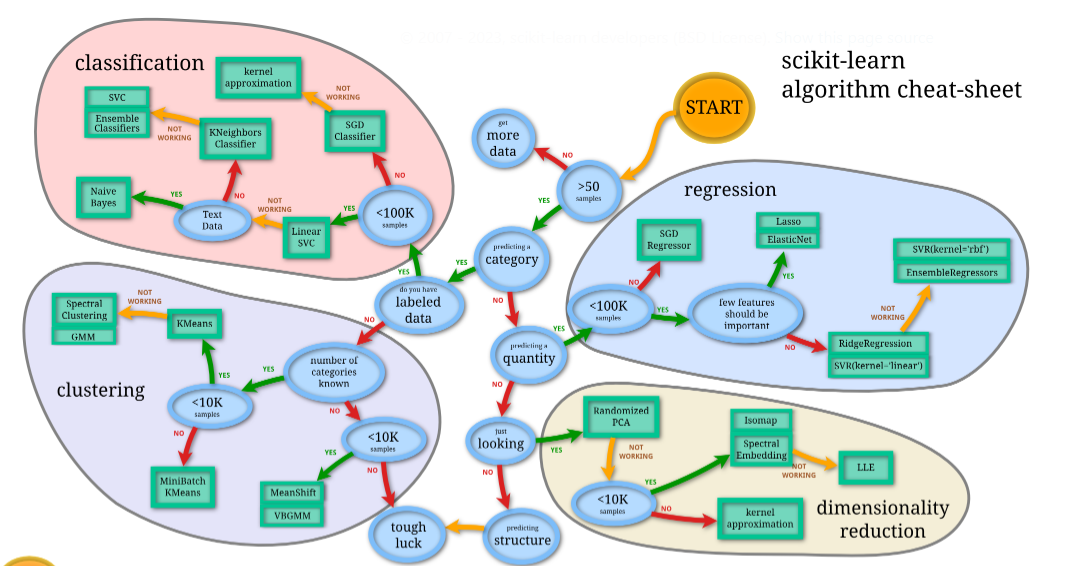

In [27]:
#q1)   Estimator 객체를 생성해서  실행해 보자. 
from  sklearn.datasets import  load_breast_cancer  # 연습용 데이터 셋  
from sklearn.model_selection import train_test_split  # 검증, 하이퍼 파라미터 튜닝, 데이터 분리  
from sklearn.tree import  DecisionTreeClassifier  #기계학습 알고리즘  
from sklearn.preprocessing import  StandardScaler # 전처리 (원핫인코딩,  정규화, 스케일링등 )

In [28]:
#1-1 연습용 데이터 로드  
data  =  load_breast_cancer() 
X_train, X_test, y_train, y_test=train_test_split(data.data, data.target, random_state = 42)

In [29]:
#1-2  Estimator  인스턴스화  , 파라미터 설정  
model  =  DecisionTreeClassifier(criterion = 'entropy'  )  
model

DecisionTreeClassifier(criterion='entropy')

In [30]:
#1- 3 fit  모형 실행  
model.fit( X_train , y_train)
#1-4  Predict   입력데이터에 대한 모델의 예측 결과를 리턴  
y_pred =  model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [31]:
#1-5 전처리 스케일링을 구현하자.  transform
#전처리 하기전 데이터 출력
print(X_train)

#전처리 작업  - 스케일링 적용
scaler  = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#전처리 후  데이터 출력 확인  
print(X_train)

[[1.289e+01 1.312e+01 8.189e+01 ... 5.366e-02 2.309e-01 6.915e-02]
 [1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.296e+01 1.829e+01 8.418e+01 ... 6.608e-02 3.207e-01 7.247e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
[[-0.34913849 -1.43851335 -0.41172595 ... -0.91671059 -0.92508585
  -0.80841115]
 [-0.20468665  0.31264011 -0.13367256 ...  1.43655962  1.14955889
   1.56911143]
 [-0.32931176 -0.21507235 -0.31739376 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 0.04739597 -0.56293662 -0.06529202 ... -1.23262438 -0.68282718
  -1.261137  ]
 [-0.04040808  0.09966199 -0.03151368 ...  1.08847951  0.48944465
   1.26159953]
 [-0.5502381   0.31264011 -0.6040977  ... -0.59582424 -0.29911546
  -0.82948141]]


In [32]:
#1-6 전처리 스케일링을 구현하자.  transform
#전처리 하기전 데이터 출력
print(X_test)

#전처리 작업  - 스케일링 적용
X_test = scaler.fit_transform(X_test)

#전처리 후  데이터 출력 확인  
print(X_test)

[[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.104e+01 1.683e+01 7.092e+01 ... 7.431e-02 2.998e-01 7.881e-02]
 [1.981e+01 2.215e+01 1.300e+02 ... 2.388e-01 2.768e-01 7.615e-02]
 [1.026e+01 1.222e+01 6.575e+01 ... 6.696e-02 2.937e-01 7.722e-02]]
[[-0.47853809 -0.21371678 -0.45835473 ... -0.27372978  0.07289581
   0.09152022]
 [ 1.37424404  0.38950001  1.29239853 ...  0.84579664 -0.67110896
  -1.02766663]
 [ 0.37769352 -0.01783827  0.3904579  ...  0.44803208 -0.21152934
  -0.28706636]
 ...
 [-0.88804017 -0.60769971 -0.87720113 ... -0.66701045  0.04718507
  -0.35853687]
 [ 1.62338166  0.57647495  1.55597935 ...  1.71220016 -0.32240694
  -0.49629888]
 [-1.11140494 -1.63383602 -1.09012501 ... -0.77332207 -0.05083716
  -0.44088334]]


In [33]:
#Q2)회귀로 적합 모델을 찾아보자. 
from sklearn.utils import all_estimators
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
 
 